In [1]:
# Import libraries and set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Define data directory
data_dir = "../data/yfinance_data"

print("Imports successful. Data directory:", data_dir)

Imports successful. Data directory: ../data/yfinance_data


In [2]:
# Cell 2: Load and combine CSV files
def load_stock_data(directory):
    try:
        all_data = []
        for file in os.listdir(directory):
            if file.endswith(".csv"):
                file_path = os.path.join(directory, file)
                df = pd.read_csv(file_path)
                df['Stock'] = file.split('_')[0]  # Extract stock symbol
                all_data.append(df)
        if not all_data:
            raise ValueError("No valid .csv files found in the directory")
        combined_df = pd.concat(all_data, ignore_index=True)
        # Assume common columns; adjust based on your data
        required_cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
        if not all(col in combined_df.columns for col in required_cols):
            raise ValueError(f"Missing required columns. Found: {combined_df.columns.tolist()}")
        combined_df['Date'] = pd.to_datetime(combined_df['Date'])
        return combined_df
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

stock_data = load_stock_data(data_dir)
if stock_data is not None:
    print("Data loaded successfully. Sample head:\n", stock_data.head())
else:
    print("Data loading failed. Check directory or file contents.")

Data loaded successfully. Sample head:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Stock  
0        0.0           0.0  AAPL  
1        0.0           0.0  AAPL  
2        0.0           0.0  AAPL  
3        0.0           0.0  AAPL  
4        0.0           0.0  AAPL  


In [6]:
# Cell 3: Compute descriptive statistics
if stock_data is not None:
    try:
        # Basic stats for price columns
        price_stats = stock_data[['Open', 'High', 'Low', 'Close']].describe()
        print("Price Statistics:\n", price_stats)

        # Stock record counts
        stock_counts = stock_data['Stock'].value_counts()
        print("\nStock Record Counts:\n", stock_counts)

        # Date trends
        date_trends = stock_data['Date'].value_counts().sort_index().head()
        print("\nDate Trends (Top 5 Days):\n", date_trends)
    except Exception as e:
        print(f"Error in descriptive stats: {str(e)}")

Price Statistics:
                Open          High           Low         Close
count  45428.000000  45428.000000  45428.000000  45428.000000
mean      46.798370     47.397792     46.190101     46.810590
std       78.259474     79.277620     77.218532     78.274673
min        0.034896      0.035547      0.033333      0.034115
25%        0.690500      0.708000      0.673541      0.693604
50%       13.646101     13.827710     13.463250     13.644750
75%       47.242501     47.720626     46.628125     47.193626
max      542.349976    542.809998    528.359985    539.909973

Stock Record Counts:
 Stock
AAPL    10998
MSFT     9672
AMZN     6846
NVDA     6421
GOOG     5020
TSLA     3545
META     2926
Name: count, dtype: int64

Date Trends (Top 5 Days):
 Date
1980-12-12    1
1980-12-15    1
1980-12-16    1
1980-12-17    1
1980-12-18    1
Name: count, dtype: int64


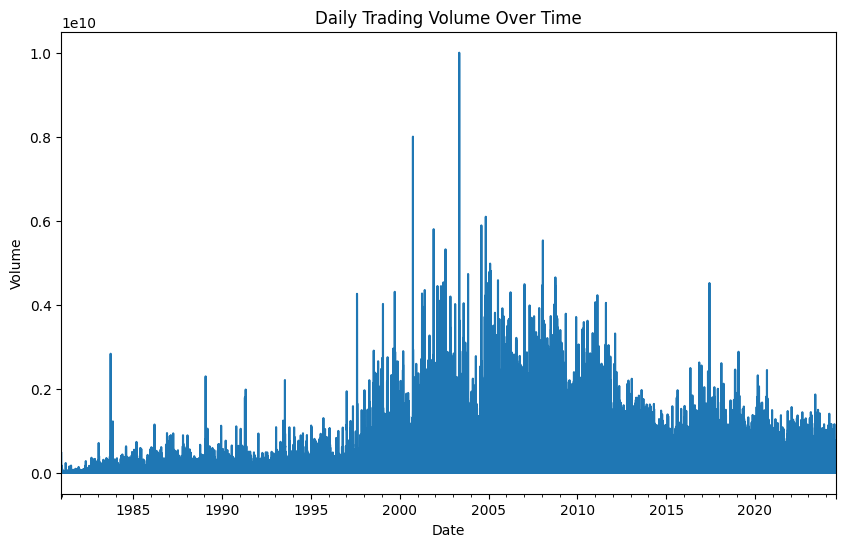

In [7]:
# Cell 4: Time series analysis
if stock_data is not None:
    try:
        stock_data.set_index('Date', inplace=True)
        daily_volume = stock_data['Volume'].resample('D').sum()
        daily_volume.plot(title="Daily Trading Volume Over Time", figsize=(10, 6))
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.show()
    except Exception as e:
        print(f"Error in time series analysis: {str(e)}")

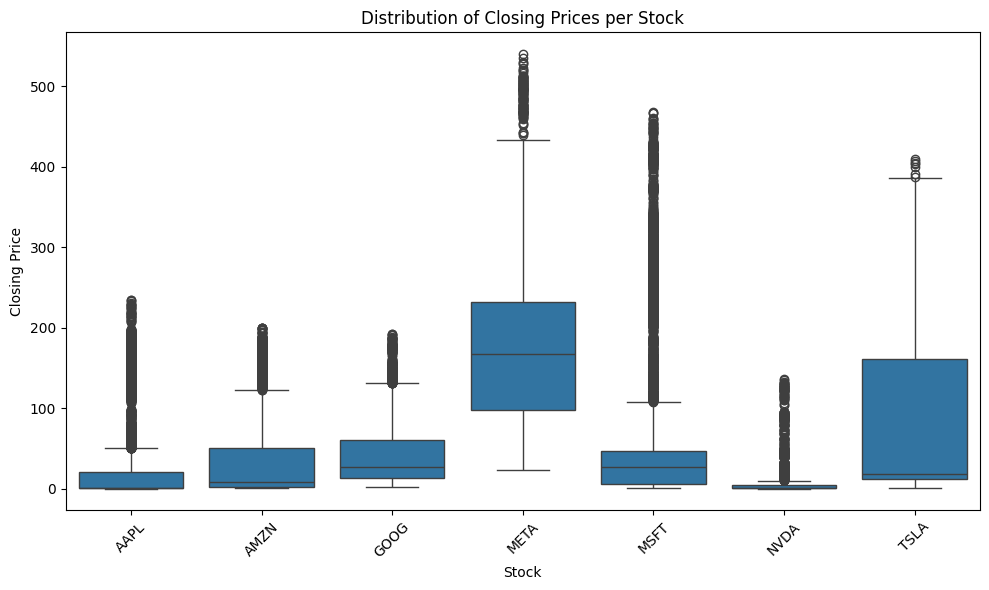

In [ ]:

if stock_data is not None:
    try:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Stock', y='Close', data=stock_data)
        plt.title("Distribution of Closing Prices per Stock")
        plt.xlabel("Stock")
        plt.ylabel("Closing Price")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting closing price distribution: {str(e)}")
